# EDA on Titanic Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

### Importing Data 

In [4]:
train = pd.read_csv('titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Starting EDA

In [6]:
# Checking for missing data

In [7]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

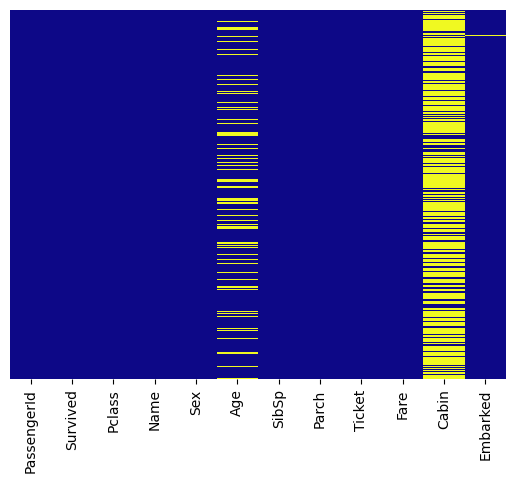

In [8]:
# To check for total null values in the dataset
# We use a heatmap using Seaborn library

snb.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')

<Axes: xlabel='Survived', ylabel='count'>

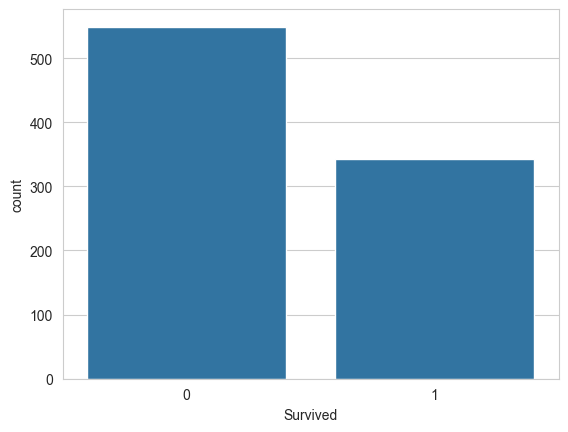

In [9]:
snb.set_style('whitegrid')
snb.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

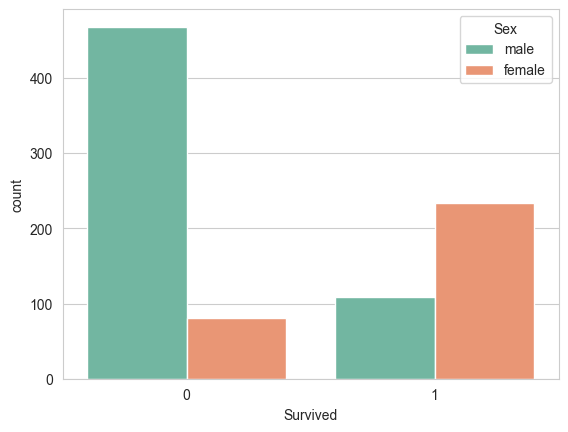

In [10]:
snb.set_style('whitegrid')
snb.countplot(x='Survived',hue='Sex',data=train,palette='Set2')

<Axes: xlabel='Survived', ylabel='count'>

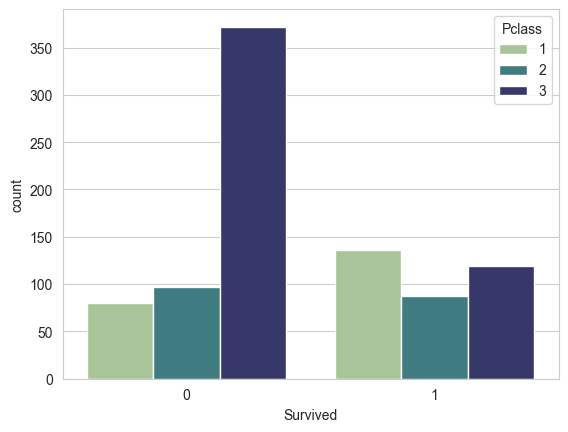

In [11]:
snb.set_style('whitegrid')
snb.countplot(x='Survived',hue='Pclass',data=train,palette='crest')

C:\Users\Pranav Deshpande\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


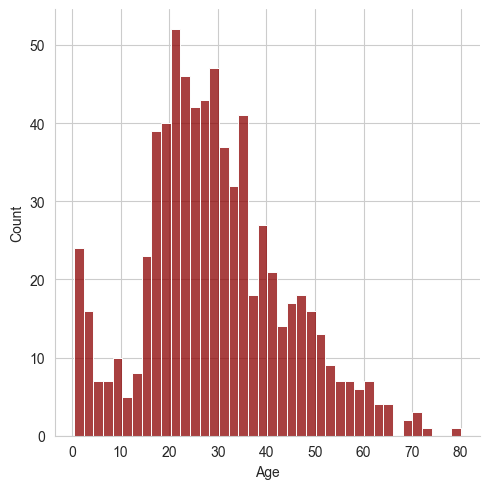

In [12]:
snb.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

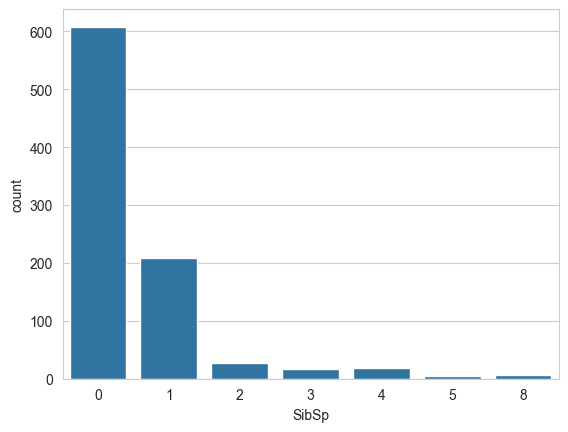

In [13]:
snb.countplot(x='SibSp',data=train)

<Axes: >

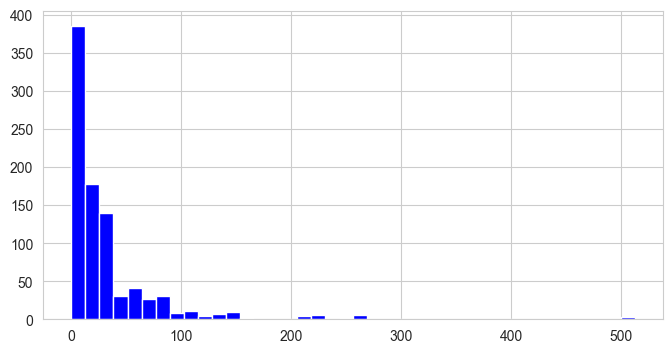

In [14]:
train['Fare'].hist(color='b',bins=40,figsize=(8,4))

### DATA CLEANING

C:\Users\Pranav Deshpande\AppData\Local\Temp\ipykernel_4656\1094215302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snb.boxplot(x='Pclass',y='Age',data=train,palette='crest')


<Axes: xlabel='Pclass', ylabel='Age'>

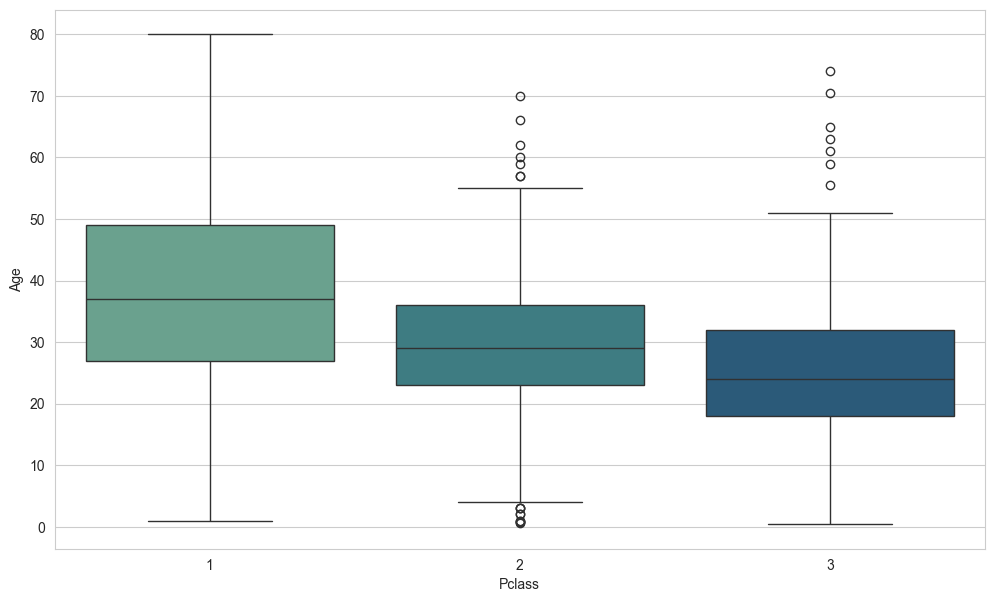

In [15]:
plt.figure(figsize=(12,7))
snb.boxplot(x='Pclass',y='Age',data=train,palette='crest')

In [16]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
train['Age'] = train[['Age','Pclass']].apply(input_age,axis=1)

In [18]:
#Dropped CAbin column due to many null values
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

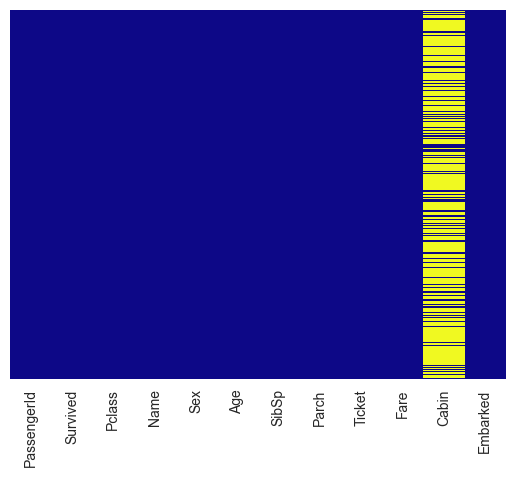

In [19]:


snb.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [20]:
train.dropna(inplace=True)

## Converting Categorical data 

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


In [22]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
1,False,False
3,False,True
6,False,True
10,False,True
11,False,True


In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [24]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
1,2,1,1,38.0,1,0,71.2833,C85
3,4,1,1,35.0,1,0,53.1000,C123
6,7,0,1,54.0,0,0,51.8625,E46
10,11,1,3,4.0,1,1,16.7000,G6
11,12,1,1,58.0,0,0,26.5500,C103


In [26]:
train=pd.concat([train,sex,embark],axis=1)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,1,38.0,1,0,71.2833,C85,False,False,False
3,4,1,1,35.0,1,0,53.1000,C123,False,False,True
6,7,0,1,54.0,0,0,51.8625,E46,True,False,True
10,11,1,3,4.0,1,1,16.7000,G6,False,False,True
11,12,1,1,58.0,0,0,26.5500,C103,False,False,True


## Building Logistic Regression Model

In [28]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,38.0,1,0,71.2833,C85,False,False,False
3,4,1,35.0,1,0,53.1000,C123,False,False,True
6,7,1,54.0,0,0,51.8625,E46,True,False,True
10,11,3,4.0,1,1,16.7000,G6,False,False,True
11,12,1,58.0,0,0,26.5500,C103,False,False,True


In [29]:
train['Survived'].head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

### Training and Predicting

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)


In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train_encoded, y_train)


LogisticRegression()

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test data using the same encoder
X_test_encoded = encoder.transform(X_test)

# Initialize and fit the logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X_train_encoded, y_train)

# Make predictions on the test data
predictions = logmodel.predict(X_test_encoded)


In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
accuracy = confusion_matrix(y_test,predictions)

In [44]:
accuracy

array([[15,  5],
       [ 7, 34]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score


In [47]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8032786885245902

In [48]:
predictions

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)